# 19W8561113 WS 2019-2020 - Data science and Big data - introduction and use cases

## Assignment for 2019-2020 Winter Semester - Prediction of Hurricanes in the Atlantic

**Submitted by:**
 * Boqin Cai 
 * Stephanie Tumampos


A corresponding summary report is also attached together with this notebook for workflow and results.


# PROBLEM 1: PREDICTING ANNUAL NUMBER OF HURRICANES 

# 1. EDA & Data cleaning

### DATASET IS UPLOADED TO THE SERVER

The dataset has already been uploaded to the server to easily access it on this notebook.

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

import os
import conda
import numpy as np

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

### USING PANDAS TO READ THE DATASET

The dataset is read using pandas. Below shows the first 10 rows. 

In [2]:
df=pd.read_excel('atlantic_revised_reduced.xlsx')

df.head(10)

ID                 Name  Date original  Year  Month  Day        Date  \
0  AL011900              UNNAMED       19000827  1900      8   27  27/08/1900   
1  AL011900              UNNAMED       19000827  1900      8   27  27/08/1900   
2  AL011900              UNNAMED       19000827  1900      8   27  27/08/1900   
3  AL011900              UNNAMED       19000827  1900      8   27  27/08/1900   
4  AL011900              UNNAMED       19000828  1900      8   28  28/08/1900   
5  AL011900              UNNAMED       19000828  1900      8   28  28/08/1900   
6  AL011900              UNNAMED       19000828  1900      8   28  28/08/1900   
7  AL011900              UNNAMED       19000828  1900      8   28  28/08/1900   
8  AL011900              UNNAMED       19000829  1900      8   29  29/08/1900   
9  AL011900              UNNAMED       19000829  1900      8   29  29/08/1900   

   Time           time hours Event Status Latitude Longitude   Lat   Lon NS  \
0     0             00:00:00           TS    15.0N     42.1W  15.0 -42.1  N   
1   600             06:00:00           TS    15.2N     43.4W  15.2 -43.4  N   
2  1200             12:00:00           TS    15.3N     44.7W  15.3 -44.7  N   
3  1800             18:00:00           TS    15.4N     45.6W  15.4 -45.6  N   
4     0  1900-01-01 00:00:00           TS    15.6N     46.6W  15.6 -46.6  N   
5   600  1900-01-01 06:00:00           TS    15.8N     47.9W  15.8 -47.9  N   
6  1200  1900-01-01 12:00:00           TS    16.0N     49.1W  16.0 -49.1  N   
7  1800  1900-01-01 18:00:00           TS    16.1N     50.3W  16.1 -50.3  N   
8     0  1900-01-02 00:00:00           TS    16.3N     51.4W  16.3 -51.4  N   
9   600  1900-01-02 06:00:00           TS    16.4N     52.4W  16.4 -52.4  N   

  EW  Maximum Wind  Minimum Pressure  
0  W            35              -999  
1  W            35              -999  
2  W            35              -999  
3  W            35              -999  
4  W            35              -999  
5  W            35              -999  
6  W            35              -999  
7  W            35              -999  
8  W            35              -999  
9  W            35              -999

### DATA EXPLORATION AND DATA CLEANING

At first, number of rows and columns are initially checked.

In [3]:
print("Data shape: ", df.shape)
print("Column names and type: \n", df.dtypes)

Data shape:  (39877, 19)
Column names and type: 
 ID                   object
Name                 object
Date original         int64
Year                  int64
Month                 int64
Day                   int64
Date                 object
Time                  int64
time hours           object
Event                object
Status               object
Latitude             object
Longitude            object
Lat                 float64
Lon                 float64
NS                   object
EW                   object
Maximum Wind          int64
Minimum Pressure      int64
dtype: object


### FINDING MISSING or DUPLICATE DATA

We need to find missing or duplicate data in the dataset. If we find any missing value or repeated rows, we will delete them.

In this case, we consider the tuple (ID, Date original, Time) the primary key of the dataset. We will use 'df.drop_duplicates()' to get the dataset without duplicate rows. From the result below, the number of rows is 39877, which is the same as the original one. Hence, there are no repeated rows.

In [4]:
df.drop_duplicates(subset=['ID', 'Date original', 'Time']).shape

(39877, 19)

Missing values are also a problem in data science. Although the datasheet tells us that in some columns, missing values are replaced by some spacific value but, we still need to validate it just in case.

In [5]:
df.isnull().any()

ID                  False
Name                False
Date original       False
Year                False
Month               False
Day                 False
Date                False
Time                False
time hours          False
Event               False
Status              False
Latitude            False
Longitude           False
Lat                 False
Lon                 False
NS                  False
EW                  False
Maximum Wind        False
Minimum Pressure    False
dtype: bool

The above result shows there is no null value in the dataset. Then, we need to explore more in the dataset. 

### CLASSIFYING VARIABLES: Categorical and Continuous

There are 2 types of variables in the dataset: categorical variables and continuous variables. 

#### CATEGORICAL VARIABLE

For categorical variables, we need to list all the values and find the abnormal value (e.g. 'Status' column)

In [6]:
print(set(df["Status"]))

{' SS', ' HU', ' DB', ' TS', ' LO', ' SD', ' EX', ' WV', ' TD'}


#### CONTINUOUS VARIABLE

For the continuous variables (e.g. latitude, longitude), we can create a box plot to find the abnormal value. 

In addition, there is no outlier because we are not considering the distribution of the data.

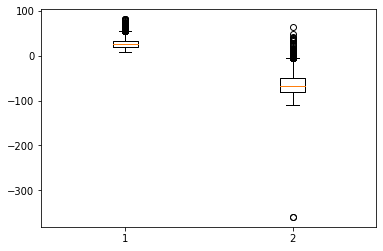

(2, 19)


ID                 Name  Date original  Year  Month  Day  \
13756  AL051952              UNNAMED       19520914  1952      9   14   
13757  AL051952              UNNAMED       19520914  1952      9   14   

             Date  Time           time hours Event Status Latitude Longitude  \
13756  14/09/1952   600  1909-05-31 00:00:00           EX    43.2N    359.1W   
13757  14/09/1952  1200  1909-05-31 06:00:00           EX    44.0N    358.4W   

        Lat    Lon NS EW  Maximum Wind  Minimum Pressure  
13756  43.2 -359.1  N  W            35              -999  
13757  44.0 -358.4  N  W            35              -999

In [7]:
plt.boxplot([df["Lat"], df["Lon"]])
plt.show()

print(df[df["Lon"]<-300].shape)

df[df["Lon"]<-300]

##### Longitude

From the above result, we figured that almost all values is in the range of the longitude and latitude. The distributions of latitude and longitude are not normal distribution but from the box plot, we can still find some values are low than -300, which absolutely makes no sense. We printed them (above) so we can obviously find the 2 rows with invalid longitude. 

In this case, we can just delete these two hurricane data to avoid wrong values in trajectory prediction but we also need keep it for the the prediction of the number of hurricanes.

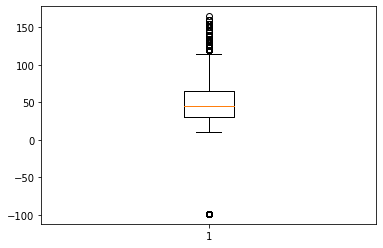

(338, 19)
49.2094440404243
(0, 19)


In [8]:
plt.boxplot([df["Maximum Wind"]])
plt.show()

print(df[df["Maximum Wind"]<0].shape)

print(df["Maximum Wind"].mean())
df["Maximum Wind"]=df["Maximum Wind"].replace(-99, df["Maximum Wind"].mean())

print(df[df["Maximum Wind"]<0].shape)

##### Maximum Wind and Minimum Pressure

The box plot here has an abnormal dot around -100. From the data sheet, we find that the missing values are replaced by -99. There are 338 missing value here so we can fill it with the average value of the Maximum Wind. 

We can do the same thing to the Minimum Pressure but there are more than a half Minimum Pressure data missing. Hence in the following process, we just abandon this column.

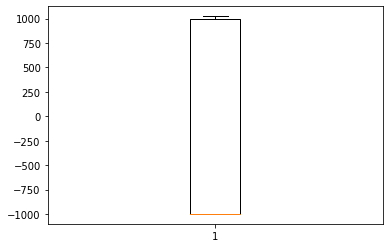

(21604, 19)


In [9]:
plt.boxplot([df["Minimum Pressure"]])
plt.show()

print(df[df["Minimum Pressure"]<0].shape)

##### Time Hours and Date 

We observed that the time hours column has data error. This column should only contain hours without year, month or date. And the Date column was considered as object. 

Hence, we need to abandon these columns and generate new data based from other columns.

In [10]:
# format datetime test
pd.to_datetime(df.Date[0]+' '+str(df.Time[0]//100), format='%d/%m/%Y %H')

Timestamp('1900-08-27 00:00:00')

Use timestamp as the index column of the dataset

In [11]:
df['timeStamp']=pd.DatetimeIndex(pd.to_datetime(df.Date+' '+(df.Time//100).astype(str), format='%d/%m/%Y %H'))
df.index=df['timeStamp']

df.head()

ID                 Name  Date original  Year  \
timeStamp                                                                 
1900-08-27 00:00:00  AL011900              UNNAMED       19000827  1900   
1900-08-27 06:00:00  AL011900              UNNAMED       19000827  1900   
1900-08-27 12:00:00  AL011900              UNNAMED       19000827  1900   
1900-08-27 18:00:00  AL011900              UNNAMED       19000827  1900   
1900-08-28 00:00:00  AL011900              UNNAMED       19000828  1900   

                     Month  Day        Date  Time           time hours Event  \
timeStamp                                                                      
1900-08-27 00:00:00      8   27  27/08/1900     0             00:00:00         
1900-08-27 06:00:00      8   27  27/08/1900   600             06:00:00         
1900-08-27 12:00:00      8   27  27/08/1900  1200             12:00:00         
1900-08-27 18:00:00      8   27  27/08/1900  1800             18:00:00         
1900-08-28 00:00:00      8   28  28/08/1900     0  1900-01-01 00:00:00         

                    Status Latitude Longitude   Lat   Lon NS EW  Maximum Wind  \
timeStamp                                                                       
1900-08-27 00:00:00     TS    15.0N     42.1W  15.0 -42.1  N  W          35.0   
1900-08-27 06:00:00     TS    15.2N     43.4W  15.2 -43.4  N  W          35.0   
1900-08-27 12:00:00     TS    15.3N     44.7W  15.3 -44.7  N  W          35.0   
1900-08-27 18:00:00     TS    15.4N     45.6W  15.4 -45.6  N  W          35.0   
1900-08-28 00:00:00     TS    15.6N     46.6W  15.6 -46.6  N  W          35.0   

                     Minimum Pressure           timeStamp  
timeStamp                                                  
1900-08-27 00:00:00              -999 1900-08-27 00:00:00  
1900-08-27 06:00:00              -999 1900-08-27 06:00:00  
1900-08-27 12:00:00              -999 1900-08-27 12:00:00  
1900-08-27 18:00:00              -999 1900-08-27 18:00:00  
1900-08-28 00:00:00              -999 1900-08-28 00:00:00

### TOTAL NUMBER OF HURRICANES

We then count the total number of hurricanes.

In [12]:
len(set(df.ID))

1443

# 2. Prepare data for time series prediction

### TIMESTAMP

Select the start time (minimal timestamp) for the time of a hurricane.

In [13]:
grouped = df.groupby('ID').min().timeStamp

In [14]:
grouped

ID
AL011900   1900-08-27 00:00:00
AL011901   1901-06-11 00:00:00
AL011902   1902-06-12 12:00:00
AL011903   1903-07-21 00:00:00
AL011904   1904-06-10 12:00:00
                   ...        
AL282005   2005-11-14 00:00:00
AL291969   1969-11-21 12:00:00
AL292005   2005-11-19 12:00:00
AL302005   2005-11-29 06:00:00
AL312005   2005-12-30 00:00:00
Name: timeStamp, Length: 1443, dtype: datetime64[ns]

### GROUPING THE DATASET

We grouped the dataset by year and month, and counted the number of the hurricanes anually or monthly. 

We then get the timeseries dataset.

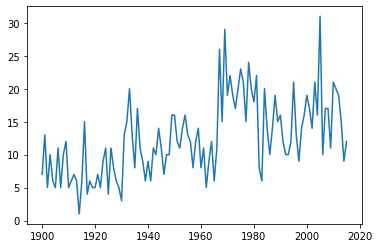

In [15]:
grouped.index=grouped
anual = grouped.groupby(grouped.index.year).count()

plt.plot(anual)

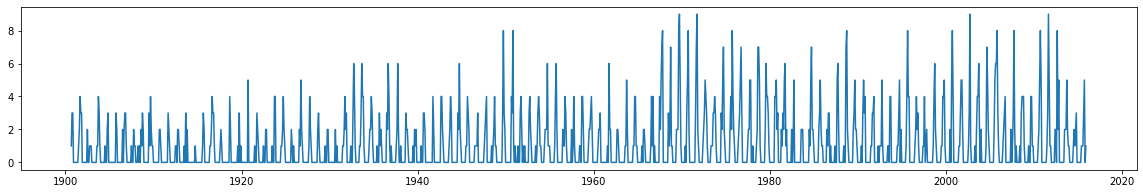

In [16]:
monthly = grouped.groupby(pd.Grouper(freq="M")).count()
plt.figure(figsize=(20,3))
plt.plot(monthly)

#### Dataset is grouped every three months

Due to the huge number of zeros, we grouped the dataset every 3 months. It's a seasonal time series.

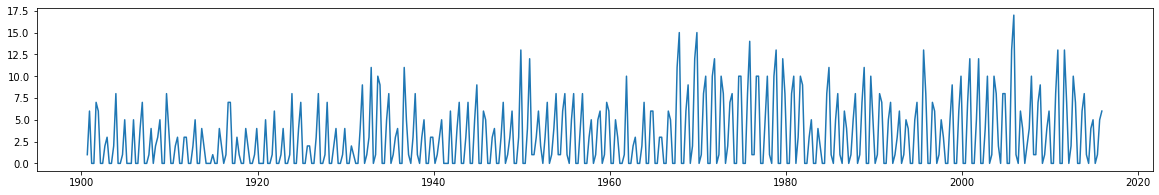

In [17]:
seasonly = grouped.groupby(pd.Grouper(freq="3M")).count()
plt.figure(figsize=(20,3))
plt.plot(seasonly)

### We now have the time series dataset for prediction.

# 3. ARIMA

Autoregressive Integrated Moving Average Model (ARIMA) is a class of statistical models for analyzing and forecasting time series data. 

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

* AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
* I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.



Reference: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


### Building models using Annual data

First, let's build models on the annual data. From the figure in OUT[15], we can find the increase trend in the data series. 

*The series is not stationary. We need to do differencing on the dataset by 1 or 2.*


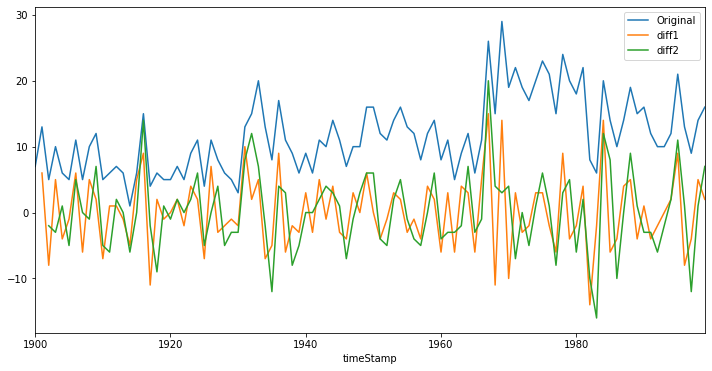

In [18]:
anual100=anual[:100]

anual100.plot(figsize=(12,6), label='Original')

diff1 = anual100.diff(1)
diff1.plot(figsize=(12,6), label='diff1')

diff2 = anual100.diff(2)
diff2.plot(figsize=(12,6), label='diff2')
plt.legend()
plt.show()

From the figure above, we can find that after the first differencing, the series is stationary. 

**So we set the d to 1.**

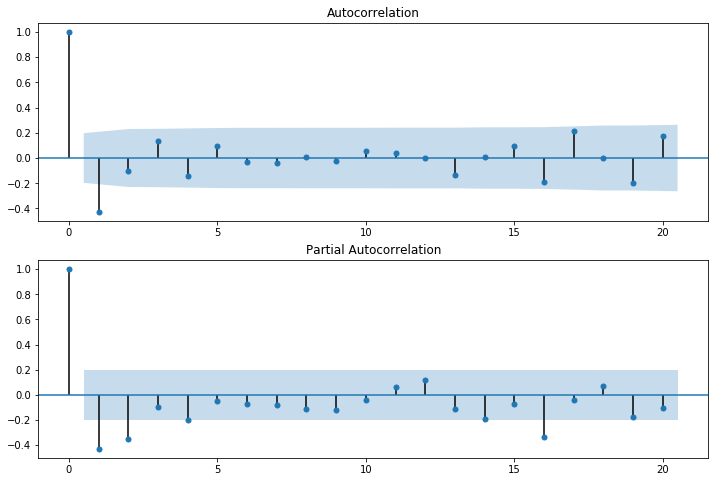

In [19]:
diff1.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=20,ax=ax2)

From theAutocorrelation Figure (ACF) figure generated above, we can see from *lag 1*, there are no more values exceeding the confidence range but, it also does not go to zero quickly. 

In the Partial Autocorrelation Figure (PACF), the value goes into the confidence range after *lag 2*. Although there are still a few values outside the confidence interval, we can consider them as outliers. So the **p** and **q** could be set to **2** and **1**, respectively.


**The whole ARIMA model is ARIMA(2,1,1).**


Now we can user python to build the model.

------
References:
* https://yuchen112358.github.io/2016/10/09/ARIMA/ (Chinese)
* https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

## ARIMA MODEL RESULTS

In [20]:
model = ARIMA(anual100, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/root/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/root/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.timeStamp   No. Observations:                   99
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -289.143
Method:                       css-mle   S.D. of innovations              4.407
Date:                Fri, 13 Mar 2020   AIC                            588.285
Time:                        18:53:21   BIC                            601.261
Sample:                             1   HQIC                           593.535
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1057      0.026      4.085      0.000       0.055       0.156
ar.L1.D.timeStamp     0.2875      0.100      2.883      0.005       0.092       0.483
ar.L2.D.timeStamp     0.

The ARIMA Model Results shown above contains a lot of significant information towards the model used. Yet, we need to focus on only two columns:

* The *coef* table shows the importance or weight of each feature and how each one could impact the time series. 
* The *P>|z|* is the most important one in this table as it tells us the significance of each feature weight. If the value of *P>|z|* is lower or close to 0.05 then it is highly significant.


### DENSITY CURVE

The following step is to test whether the residuals are normally distributed. And from the density curve generated below, we figured that it has a normal distribution and suggests a near zero mean and uniform variance.

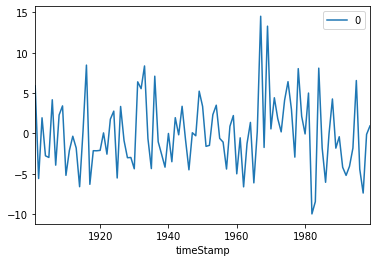

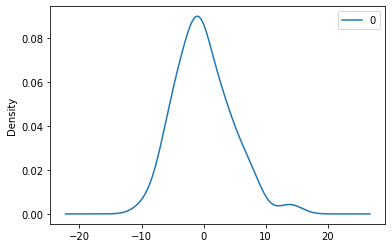

               0
count  99.000000
mean   -0.053814
std     4.503290
min    -9.986784
25%    -2.984606
50%    -0.413096
75%     2.544564
max    14.534534


In [21]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')

plt.show()
print(residuals.describe())

## ARIMA MODEL FORECASTING

We will then generate a graph to show the forecast of the ARIMA model.

In [22]:
fc, se, conf = model_fit.forecast(16, alpha=0.05)

fc_series = pd.Series(fc, index=range(2000, 2016))
lower_series = pd.Series(conf[:, 0], index=range(2000, 2016))
upper_series = pd.Series(conf[:, 1], index=range(2000, 2016))

### Generating a graph of the actual vs forecasted model

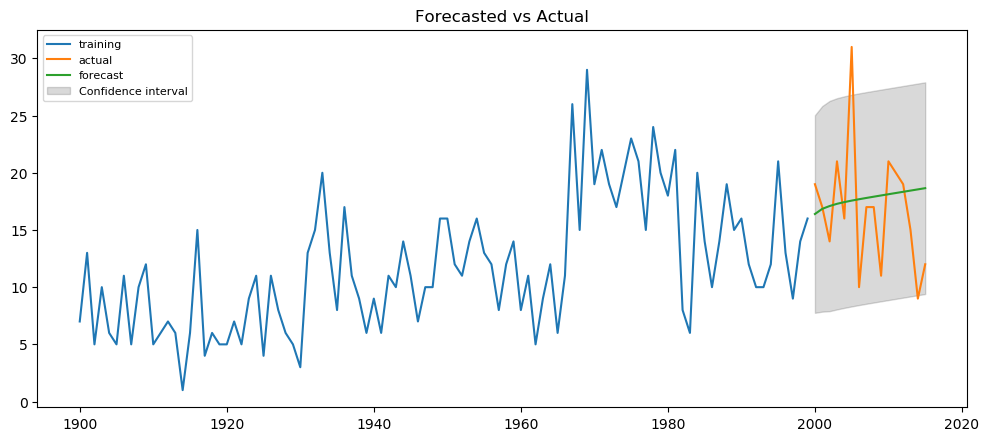

In [23]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(anual100, label='training')
plt.plot(anual[100:], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label="Confidence interval")
plt.title('Forecasted vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The graph above shows the **training**, **actual** and the **forecast** using ARIMA. It also shows the **Confidence Interval** which could give an estimate of computed bounds of the observed data.

# 4. RNN time series prediction

Aside from the ARIMA model, we can also use deep learning methods to predict time series such as the **Recurrent Neural Network (RNN)**.

### What is RNN?

The Recurrent Neural Network processes sequences one element at a time while retaining a memory called a state, of what has come before in the sequence.

This means that the output of the current step becomes the input of the next time step and considers not only the current input but also remembers the preceding elements. This allows long-term dependencies and considers the whole context into account when making a prediction.

The main element of the RNN is a layer of memory cells and it uses the same weights for each step. Hence, using RNN is well suited for a time series data.

------
References:
* https://www.analyticsvidhya.com/blog/2019/01/fundamentals-deep-learning-recurrent-neural-networks-scratch-python/
* https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470
* https://www.tensorflow.org/tutorials/structured_data/time_series

### Preparing the dataset

In [24]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

train_set=window_dataset(anual[:100], 5, 16)
valid_set=window_dataset(anual[100:], 5, 16)


### Building the RNN


At first, we build an RNN which can accept any length of time series so we can use one-step and multi-step forecast.

#### Finding the optimal learning rate

We create a model using the Keras Sequential API with layers Lambda, SimpleRNN and Dense.

* The Lambda layer exists so that arbitrary TensorFlow functions can be used when constructing Sequential and Functional API models. Lambda layers are best suited for simple operations or quick experimentation.

* The Dense layer implements the operation: **output = activation(dot(input, kernel) + bias)** where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

* The SimpleRNN layer is a fully-connected RNN where the output is to be fed back to input.

References:
* https://keras.io/layers/core/
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Lambda
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN


In [25]:
model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
6/6 [==============================] - 2s 294ms/step - loss: 81.8198 - mae: 82.4472
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 63.2044 - mae: 63.4546
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 41.4653 - mae: 41.3963
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 36.1199 - mae: 34.3456
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 32.0618 - mae: 33.2517
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 28.8150 - mae: 30.4137
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 29.2216 - mae: 29.9367
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 28.1635 - mae: 27.8695
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 25.9633 - mae: 26.3069
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 25.5484 - mae: 24.9877
Epoch 11/100
6/6 [==============================] - 0s 

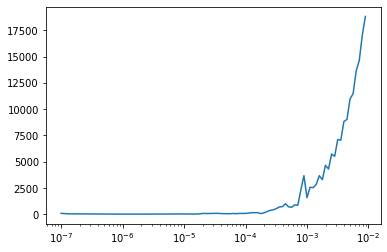

In [26]:
plt.semilogx(history.history["lr"], history.history["loss"])
#plt.axis([1e-7, 1e-4, 0, 30])

#### Using the optimal learning rate



In [27]:
model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(lr=1.5e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint", save_best_only=True)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])


model=keras.models.load_model("my_checkpoint")

Epoch 1/500
      6/Unknown - 2s 254ms/step - loss: 147.6421 - mae: 149.1679WARNING:tensorflow:From /root/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_checkpoint/assets
6/6 [==============================] - 5s 837ms/step - loss: 147.6421 - mae: 149.1679 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 2/500
INFO:tensorflow:Assets written to: my_checkpoint/assets
6/6 [==============================] - 3s 462ms/step - loss: 70.1026 - mae: 70.6026 - val_loss: 25.8727 - val_mae: 26.3727
Epoch 3/500
6/6 [==============================] - 0s 15ms/step - loss: 45.8960 - mae: 46.3884 - val_loss: 59.2991 - val_mae: 59.7991
Epoch 4/500
6/6 [============================

### RNN TIME SERIES FORECASTING: One-step Forecast and Multi-step Forecast

Time series forecasting is considered to be an important area of machine learning with an ultimate goal of predicting the future. It is also called “forecasting by exploring the pattern from past data”. 


Reference: 

* Masum, Y. et al., "Multi-step Time Series Forecasting of Electric Load using Machine Learning Models". Link: https://core.ac.uk/download/pdf/159078987.pdf. Date accessed: March 9, 2020


### FORECASTING STRATEGIES

There are two ways to predict the time series: **One-step forecast** and **Multi-step forecast**. 

### One-step Forecast

One-step or a single step forecast uses a given dataset to predict the next 1 value. The model learns to predict a single point in the future based on some history provided. Single-step forecasting is applicable where short-term forecasting is required (e.g. durations of several minutes, hours or days -- these are considered short-term.)

Reference:
* https://www.tensorflow.org/tutorials/structured_data/time_series
* Masum, Y. et al., "Multi-step Time Series Forecasting of Electric Load using Machine Learning Models". Link: https://core.ac.uk/download/pdf/159078987.pdf. Date accessed: March 9, 2020


In [28]:
def oneStepForecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(16).prefetch(1)

    forecast = model.predict(ds)
    return forecast

oneStep=oneStepForecast(model, anual[100 - 4:].astype(np.float32), 5)
oneStep

array([[17.466356 ],
       [15.2876215],
       [12.3308735],
       [14.55036  ],
       [14.455062 ],
       [15.549025 ],
       [ 4.6111665],
       [17.911156 ],
       [19.442719 ],
       [12.551742 ],
       [11.252711 ],
       [18.83597  ],
       [20.667522 ],
       [12.493896 ],
       [13.560945 ],
       [15.470765 ]], dtype=float32)

### Multi-step Forecast

Multi-step forecasting is useful where the field of application requires long-term duration forecasting. 

Reference:

* Masum, Y. et al., "Multi-step Time Series Forecasting of Electric Load using Machine Learning Models". Link: https://core.ac.uk/download/pdf/159078987.pdf. Date accessed: March 9, 2020


In [29]:
def multiStepForecast(model, series, windows_size):
    data=np.array(series[:5]).reshape((-1))
    forecast=np.array([])
    for i in range(series.shape[0]-windows_size):
        forecast_value=model.predict(data.reshape(1,-1))
        forecast=np.append(forecast, forecast_value)
        data=np.append(data[1:], forecast_value)
    return forecast

multiStep=multiStepForecast(model, anual[100 - 5:].astype(np.float32), 5)
multiStep

array([18.34857178, 17.13117218, 15.45342255, 13.81041718, 11.89945793,
       11.9586792 , 12.9367094 , 13.6422472 , 13.05984974, 11.73888588,
       11.00119019, 11.49930954, 12.30208683, 12.13377857, 11.09213829,
       10.43268871])

## PLOTTING ACTUAL VS FORECASTED

* ARIMA
* One-step RNN
* Multi-step RNN

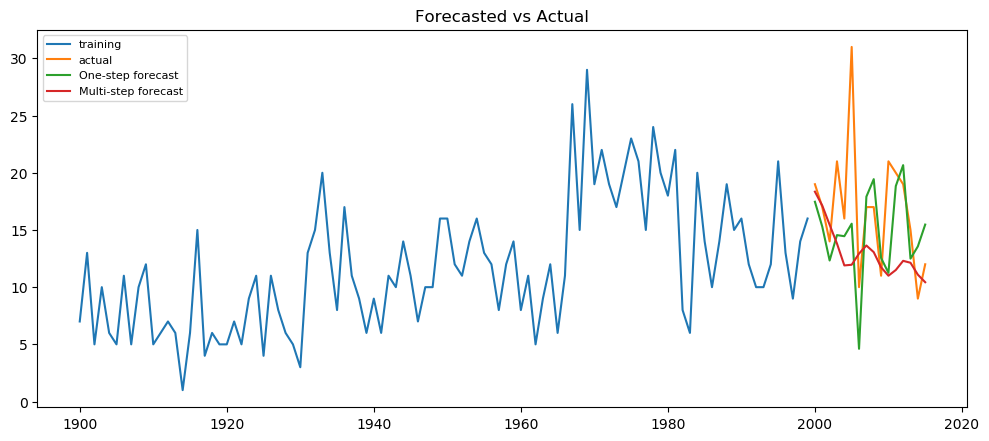

In [30]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(anual[:100], label='training')
plt.plot(anual[100:], label='actual')
plt.plot(anual[100:].index, oneStep, label='One-step forecast')
plt.plot(anual[100:].index, multiStep, label='Multi-step forecast')
plt.title('Forecasted vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## ROOT MEAN SQUARE ERROR and MEAN ABSOLUTE ERROR

In [31]:
print("ARIMA RMSE:          ", sqrt(mean_squared_error(fc_series, anual[100:])))
print("RNN One-step RMSE:   ", sqrt(mean_squared_error(oneStep, anual[100:])))
print("RNN Multi-step RMSE: ", sqrt(mean_squared_error(multiStep, anual[100:])))

print('')
print("ARIMA MAE:           ", mean_absolute_error(fc_series, anual[100:]))
print("RNN One-step MAE:    ", mean_absolute_error(oneStep, anual[100:]))
print("RNN Multi-step MAE:  ", mean_absolute_error(multiStep, anual[100:]))

ARIMA RMSE:           5.486221461816286
RNN One-step RMSE:    5.404317416819603
RNN Multi-step RMSE:  6.622634757374525

ARIMA MAE:            4.1124230113995885
RNN One-step MAE:     3.8607379496097565
RNN Multi-step MAE:   4.704003214836121


The graph generated above shows the two forecast strategy outputs. The one-step forecast and multi-step forecast outputs is displayed over the training dataset from 1900 to 1999, and an actual dataset from 2000 to 2015 for comparison. 

It is seen that there is discrepancy between the actual dataset versus the ARIMA, one-step and the multi-step RNN forecast. 

*Note: The dataset is not normalized.*

   -------------------------------------
 

# QUESTION 2: PREDICTING THE TRAJECTORY OF THE HURRICANE 

# 1. Deep learning predict trajectory

In Out[7], we found AL051952 contains two rows with wrong/invalid Longitude data. In order to predict trajectory, we can just remove that hurricane data directly to avoid unexpected errors.	

**In this case, we just need to use lats, lons and Maximum Wind to predict the next coordinate.**

Here, we extract a smaller dataset from the original one. We will transform features by scaling each feature to a given range. We will scale and translate each feature individually such that it is in the given range on the training set. Then, we normalize the scaled array of Lat, Lon, Maximum Wind.


Reference:
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


### Normalizing the data

The first step was to normalize the dataset. This is to put all data in the dataset to a common value.

In [32]:
#df=df.drop(df[df.ID=="AL051952"].index)
dfExtracted = df[['ID','Lat','Lon','Maximum Wind']]
                                                
minMaxScaler=preprocessing.MinMaxScaler()
normalizedArray=minMaxScaler.fit_transform(dfExtracted.iloc[:,1:])

normalizedDf=dfExtracted.copy()
normalizedDf['Lat']=normalizedArray[:,0]
normalizedDf['Lon']=normalizedArray[:,1]
normalizedDf['Maximum Wind']=normalizedArray[:,2]
normalizedDf

ID       Lat       Lon  Maximum Wind
timeStamp                                                      
1900-08-27 00:00:00  AL011900  0.105691  0.751007      0.161290
1900-08-27 06:00:00  AL011900  0.108401  0.747927      0.161290
1900-08-27 12:00:00  AL011900  0.109756  0.744847      0.161290
1900-08-27 18:00:00  AL011900  0.111111  0.742715      0.161290
1900-08-28 00:00:00  AL011900  0.113821  0.740346      0.161290
...                       ...       ...       ...           ...
2015-11-12 12:00:00  AL122015  0.462060  0.731343      0.290323
2015-11-12 18:00:00  AL122015  0.470190  0.732528      0.290323
2015-11-13 00:00:00  AL122015  0.464770  0.734186      0.258065
2015-11-13 06:00:00  AL122015  0.455285  0.738214      0.225806
2015-11-13 12:00:00  AL122015  0.453930  0.743189      0.225806

[39877 rows x 4 columns]

### Predicting the next coordinate of the hurricane

We will use the past **8** *lats*, *lons* and *Maximum Wind* to predict the next coordinate of the hurricane. This means the input data is a 2-dimention matrix which contains 4 rows of time with 3 columns of lats, lons and Maximum Wind. 

**The output value is a 2-dimention vector which are the *lat* and *lon*.** 

The coordinates of each hurricane are not continuous, so we need to deal with the hurricane seperately.

In [33]:
set(dfExtracted.ID)

{'AL171995',
 'AL061963',
 'AL151972',
 'AL161967',
 'AL061945',
 'AL031935',
 'AL071955',
 'AL071909',
 'AL121971',
 'AL031917',
 'AL141995',
 'AL061937',
 'AL061921',
 'AL071957',
 'AL122010',
 'AL041954',
 'AL121996',
 'AL021965',
 'AL071940',
 'AL041935',
 'AL091948',
 'AL131990',
 'AL011969',
 'AL032005',
 'AL011925',
 'AL082004',
 'AL082003',
 'AL082011',
 'AL041937',
 'AL141977',
 'AL061939',
 'AL081980',
 'AL031952',
 'AL121972',
 'AL021986',
 'AL121999',
 'AL031906',
 'AL261967',
 'AL201976',
 'AL121955',
 'AL061989',
 'AL101909',
 'AL041926',
 'AL242005',
 'AL121975',
 'AL012005',
 'AL041978',
 'AL021900',
 'AL032012',
 'AL061916',
 'AL072009',
 'AL182011',
 'AL071970',
 'AL081975',
 'AL122003',
 'AL161988',
 'AL041918',
 'AL041925',
 'AL132004',
 'AL091984',
 'AL091940',
 'AL181976',
 'AL091975',
 'AL081955',
 'AL081952',
 'AL091955',
 'AL122015',
 'AL011933',
 'AL061987',
 'AL021925',
 'AL101955',
 'AL031913',
 'AL182000',
 'AL111924',
 'AL061908',
 'AL021975',
 'AL021913',

### Splitting the dataset

In this part, the dataset is now splitted into two parts. One is the training dataset and the other, test dataset.

The proportion is 9:1 with 90% as the training dataset and the other 10% is the test dataset.

In [34]:
from sklearn.model_selection import train_test_split

train, test=train_test_split(dfExtracted.ID, test_size=0.1, random_state=11)

train

timeStamp
2009-08-15 18:00:00    AL032009
1952-10-20 18:00:00    AL101952
1906-10-02 12:00:00    AL071906
1989-10-13 18:00:00    AL141989
2010-08-08 06:00:00    AL042010
                         ...   
2000-08-24 06:00:00    AL072000
1932-09-15 18:00:00    AL041932
1972-10-19 12:00:00    AL181972
2008-09-10 12:00:00    AL092008
1940-09-07 18:00:00    AL051940
Name: ID, Length: 35889, dtype: object

### Reshaping the data

We transformed the data to the shape that we need in the model by using multi-variable slide window. We have already saved the data on the disk, so it's not necessary to run the following two cells.

In [ ]:
def df2Matrix(inputDataframe, window=8):
    outArrayX, outArrayY =[],[]
    for i in range(inputDataframe.shape[0]-window):
        X=np.array(inputDataframe.iloc[i:i+window, 1:])
        Y=np.array(inputDataframe.iloc[i+window, 1:3])
        outArrayX.append(X)
        outArrayY.append(Y)
    return outArrayX, outArrayY

    
testX, testY=[],[]
for i in tqdm(test):
    x, y= df2Matrix(normalizedDf[normalizedDf.ID==i])
    testX.extend(x)
    testY.extend(y)

trainX, trainY=[],[]
for i in tqdm(train):
    x, y= df2Matrix(normalizedDf[normalizedDf.ID==i])
    trainX.extend(x)
    trainY.extend(y)

### Saving the transformed dataset to the disk

Since the process is too slow, we opted to save the data to the disk. This is for easier callback.

In [ ]:
trainX=np.array(trainX, dtype=np.float32)
trainY=np.array(trainY, dtype=np.float32)

np.save('X.train',trainX)
np.save('Y.train',trainY)

testX=np.array(testX, dtype=np.float32)
testY=np.array(testY, dtype=np.float32)

np.save('X.test',testX)
np.save('Y.test',testY)

### Reading and validating the dataset from the disk

This is to check if the model is overfit or not. If there is loss, then there is an underfit.


In [35]:
trainX, trainY=np.load('X.train.npy'),np.load('Y.train.npy')
testX, testY=np.load('X.test.npy'),np.load('Y.test.npy')

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

validateX, validateY=trainX[1000000:],trainY[1000000:]
trainX, trainY=trainX[:1000000],trainY[:1000000]

print(trainX.shape)
print(trainY.shape)
print(validateX.shape)
print(validateY.shape)

trainDataset = tf.data.Dataset.from_tensor_slices((trainX, trainY))
trainDataset=trainDataset.batch(32) 
trainDataset=trainDataset.shuffle(buffer_size=1000)


valDataset = tf.data.Dataset.from_tensor_slices((validateX, validateY))
valDataset=valDataset.batch(32) 
valDataset=valDataset.shuffle(buffer_size=1000)

(1080841, 8, 3)
(1080841, 2)
(120528, 8, 3)
(120528, 2)
(1000000, 8, 3)
(1000000, 2)
(80841, 8, 3)
(80841, 2)


## Keras Sequential and LSTM

Long Short-Term Memory networks, or LSTMs for short, are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. LSTM have different types and in this problem, we used stacked LSTM. 

An LSTM layer requires a 3D input. LSTMs by default will produce a 2D output as an interpretation from the end of the sequence.

Here, we pass different layers instances to the constructor. We used LSTM layer, Dropout and Dense layer to achieve two output layers in the end. The function used in this constructor is **tanh**. This function is usually used in regression.

### Stacking LSTM layer instances

Stacking 3 LSTM layer instances make the modl capable of learning higher-level temporal representations. The LSTM sequences have initial 64 neurons or nodes with an input shape of 8 x 3 (past 8 positions, 3 for lat, lon and max wind), and a return sequence rendering a 'stateful' recurrent model which allows a 3D output from hidden LSTM layer as input to the next. There's a Dropout layer of 10% to avoid overfitting.


Reference: 
* https://keras.io/getting-started/sequential-model-guide/#stacked-lstm-for-sequence-classification
* https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
* https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/

The following 3 cells are the training process of the LSTM. We have done it on Google Colab. So no need for running again.

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(64, input_shape=(8, 3),return_sequences=True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(64),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(2, activation="tanh")
])

model.summary()

model.compile(loss="mse",
              optimizer="rmsprop",
              metrics=["mae", "acc"])
history = model.fit(trainDataset, epochs=1, validation_data=valDataset)

### Epoch

An epoch is a measure of the number of times all of the training vectors are used once to update the weights. It refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs. In this case, there are 10 epochs.

Reference:
* https://www.mathworks.com/matlabcentral/answers/62668-what-is-epoch-in-neural-network
* https://deepai.org/machine-learning-glossary-and-terms/epoch

In [ ]:
history = model.fit(dataset, epochs=10)

### Produced LSTM Model

Given the processes above for LSTM, we produce the model output below. We read the trained model from the disk.

In [39]:
model=keras.models.load_model('cm.h5')

## 2. Traditional machine learning

In this part, we go back to the foundations of machine learning - traditional machine learning, where we will use Linear Regression and Decision Tree Regressor.

### Linear Regression

Linear Regression is a linear model that assumes a linear relationship between input variables and the single output variable. The output variable can be calculated from a linear combination to the input variables. 

In scikit-learn, LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Reference:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://machinelearningmastery.com/linear-regression-for-machine-learning/

-
-

### Decision Tree Regressor

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs and utility. Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.


Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

Reference:
* https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

### Implementation of Machine Learning techniques

Implementing scikit-learn tools importing Linear Regression and DecisionTreeRegressor.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr_model=LinearRegression(n_jobs=-1)    #Use all processors to speed up
lr_model.fit(trainX[:].reshape(-1, 24), trainY)

tree_model=DecisionTreeRegressor(min_samples_split=100, max_depth=30)
tree_model.fit(trainX[:].reshape(-1, 24), trainY)

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Checking output

Displaying the data of the test model.

In [41]:
print(tree_model.predict(testX[100:110].reshape(-1, 24)))
print(testY[100:110])

[[0.08062331 0.79068941]
 [0.08062331 0.79068941]
 [0.08536585 0.78426707]
 [0.08536585 0.78426707]
 [0.08943089 0.782516  ]
 [0.09049255 0.78001009]
 [0.08943089 0.7768059 ]
 [0.08943089 0.77493483]
 [0.09078591 0.77232885]
 [0.09214092 0.77019662]]
[[0.0799458  0.7919924 ]
 [0.08130081 0.7893864 ]
 [0.08401084 0.7872542 ]
 [0.08672087 0.7848851 ]
 [0.08943089 0.782516  ]
 [0.08943089 0.77967304]
 [0.08943089 0.77730393]
 [0.08943089 0.7749348 ]
 [0.09078591 0.77232885]
 [0.09214092 0.7701966 ]]


In [42]:
lr_model.coef_

array([[ 1.33099668e-02, -2.95102634e-02, -4.18210431e-04,
        -2.29764351e-04,  1.01440899e-01, -1.02464866e-04,
         1.50522646e-02, -1.28603935e-01,  1.28585706e-03,
        -4.81492057e-02,  1.84312120e-01, -1.54727309e-06,
         3.44517492e-02,  2.12923940e-02, -8.60626751e-04,
         7.65121654e-02, -4.32131588e-01, -6.96987903e-04,
        -1.10930741e+00,  2.56485671e-01,  3.84827890e-03,
         2.01855826e+00,  2.60804556e-02, -2.11630738e-03],
       [-4.75034816e-03,  5.02239019e-02,  3.51106835e-04,
        -4.61191032e-03,  4.64144237e-02, -2.56862142e-04,
        -2.30379924e-02, -1.49456114e-01,  4.73055989e-04,
         4.10202369e-02,  6.50372803e-02,  6.86873100e-04,
         9.23687126e-03,  1.49436831e-01, -8.14489380e-04,
         1.22849201e-03, -1.15282845e+00, -8.14681771e-05,
        -5.37270010e-02,  9.35914934e-01, -2.15857429e-03,
         3.79184484e-02,  1.05179977e+00,  1.70321716e-03]], dtype=float32)

## 3. Mean absolute error

The mean absolute error is the average of all absolute values of each prediction error.

* First two print lines pertain to the Decision Tree Regressor Model
* Second two print lines pertain to the Linear Regression Model
* Third two print lines pertain to the LSTM

In [43]:
print(mean_absolute_error(trainY, tree_model.predict(trainX.reshape(-1, 24))))
print(mean_absolute_error(testY, tree_model.predict(testX.reshape(-1, 24))))

print(mean_absolute_error(trainY, lr_model.predict(trainX.reshape(-1, 24))))
print(mean_absolute_error(testY, lr_model.predict(testX.reshape(-1, 24))))

print(mean_absolute_error(trainY[:], model.predict(trainX[:])))
print(mean_absolute_error(testY[:], model.predict(testX[:])))

0.0005949976161051646
0.0006104345073781093
0.0017500554
0.0017387224
0.0047004675
0.0046900804


In [44]:
trainX.shape

(1000000, 8, 3)

## 4. Prediction & Visualization

To better portray the values and easily compare the trajectory of the predited values versus the actual data, we drew a map.

In [45]:
def drawMap(data):
    '''
    Input data is a list. Every element in this list should have 4 elements. 1. Lon, 2. Lat, 3. Marker type 4. Label name
    '''
    plt.figure(figsize=(15,12))
    m = Basemap(width=12000000,height=9000000,projection='lcc',
                resolution='c',lat_1=30.,lat_2=45,lat_0=40,lon_0=-55.)
    m.drawcoastlines()
    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='coral',lake_color='aqua')
    parallels = np.arange(0.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])
    
    for i in data:
        m.plot(np.array(i[0]), np.array(i[1]), i[2], label=i[3], latlon=True)
    plt.legend(loc='lower right')
    plt.show()

### One-step Prediction and Multi-step Prediction

We also implemented a one-step prediction (single-step) and multi-step prediction for all models used in this part.

**We also defined that if a hurricane has less than 8 points then, it must be skipped.**

In [46]:
def oneStepPredictHurricane(myModel, hurricaneDf, scaler, window=8):
    '''
    '''
    # If hurricane has less than 8 point, than skip it
    if(hurricaneDf.shape[0]<8):
        return
    else:
        oneHurricane=hurricaneDf[['Lat','Lon','Maximum Wind']]
        oneHurricaneScaled=scaler.transform(oneHurricane)
        outArrayX=[]
        for i in range(hurricaneDf.shape[0]-window):
            X=np.array(oneHurricaneScaled[i:i+window, :])
            outArrayX.append(X)
        outArrayX=np.array(outArrayX)
        if(str(type(myModel)).find("tensorflow")>0):
            predicted=myModel.predict(outArrayX)
        elif(str(type(myModel)).find("sklearn")>0):
            predicted=myModel.predict(outArrayX.reshape(-1,24))
    return oneHurricane, scaler.inverse_transform(np.c_[predicted,[0]*(hurricaneDf.shape[0]-window)])[:,:2]

def multiStepPredictHurricane(myModel, hurricaneDf, scaler, window=8):
    '''
    '''
    # If hurricane has less than 8 point, than skip it
    if(hurricaneDf.shape[0]<8):
        return
    else:
        oneHurricane=hurricaneDf[['Lat','Lon','Maximum Wind']]
        oneHurricaneScaled=scaler.transform(oneHurricane)
        X=oneHurricaneScaled[:window,:]
        outArrayX=[]
        for i in range(hurricaneDf.shape[0]-window):
            if(str(type(myModel)).find("tensorflow")>0):
                predicted=myModel.predict(X.reshape(1,8,3))
            elif(str(type(myModel)).find("sklearn")>0):
                predicted=myModel.predict(X.reshape(-1,24))
            outArrayX.extend(predicted)
            X=np.r_[X[1:,:], np.array([[predicted[0,0],predicted[0,1], oneHurricaneScaled[i + window,2]]])]
    
        outArrayX=np.array(outArrayX)
        
    return oneHurricane, scaler.inverse_transform(np.c_[outArrayX,[0]*(hurricaneDf.shape[0]-window)])[:,:2]

multiStepPredictHurricane(model,df[df.ID=='AL031968'],minMaxScaler )

(                      Lat   Lon  Maximum Wind
 timeStamp                                    
 1968-06-22 18:00:00  20.0 -96.0          25.0
 1968-06-23 00:00:00  21.5 -96.0          30.0
 1968-06-23 06:00:00  23.1 -96.0          30.0
 1968-06-23 12:00:00  24.8 -96.1          30.0
 1968-06-23 18:00:00  26.4 -96.6          45.0
 1968-06-24 00:00:00  28.3 -97.2          60.0
 1968-06-24 06:00:00  30.1 -97.8          30.0
 1968-06-24 12:00:00  32.1 -97.8          25.0
 1968-06-24 18:00:00  34.1 -96.9          25.0
 1968-06-25 00:00:00  35.9 -95.5          25.0
 1968-06-25 06:00:00  38.2 -93.0          25.0
 1968-06-25 12:00:00  40.0 -90.0          25.0
 1968-06-25 18:00:00  41.0 -86.8          25.0
 1968-06-26 00:00:00  41.7 -83.6          25.0
 1968-06-26 06:00:00  42.0 -80.0          25.0,
 array([[ 33.53420582, -96.11163731],
        [ 34.55565206, -93.61939999],
        [ 35.22205612, -90.55071689],
        [ 35.64988343, -87.20996307],
        [ 35.86773732, -83.66544553],
        [ 

### Defining the labels for the visualization map output

In [47]:
def predictHurricaneAll(h_id, models):
    mapList=[]
    o, p=oneStepPredictHurricane(models[0], df[df.ID==h_id] ,minMaxScaler)
    mapList.append([o.Lon, o.Lat, 'b.-', 'Original'])
    mapList.append([p[:,1], p[:,0], 'r^-', 'One-step LR Predicted'])
    
    o, p=oneStepPredictHurricane(models[1], df[df.ID==h_id] ,minMaxScaler)
    mapList.append([p[:,1], p[:,0], 'g^-', 'One-step Tree Regression Predicted'])
    
    o, p=oneStepPredictHurricane(models[2], df[df.ID==h_id] ,minMaxScaler)
    mapList.append([p[:,1], p[:,0], 'y^-', 'One-step LSTM Predicted'])
    
    o, p=multiStepPredictHurricane(models[0], df[df.ID==h_id] ,minMaxScaler)
    mapList.append([p[:,1], p[:,0], 'c*-', 'Multi-step LR Predicted M'])
    
    o, p=multiStepPredictHurricane(models[1], df[df.ID==h_id] ,minMaxScaler)
    mapList.append([p[:,1], p[:,0], 'm*-', 'Multi-step Tree Regression Predicted'])
    
    o, p=multiStepPredictHurricane(models[2], df[df.ID==h_id] ,minMaxScaler)
    mapList.append([p[:,1], p[:,0], '*-', 'Multi-step LSTM Predicted'])
    
    drawMap(mapList)


## Prediction outputs

### For hurricane "AL071906"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


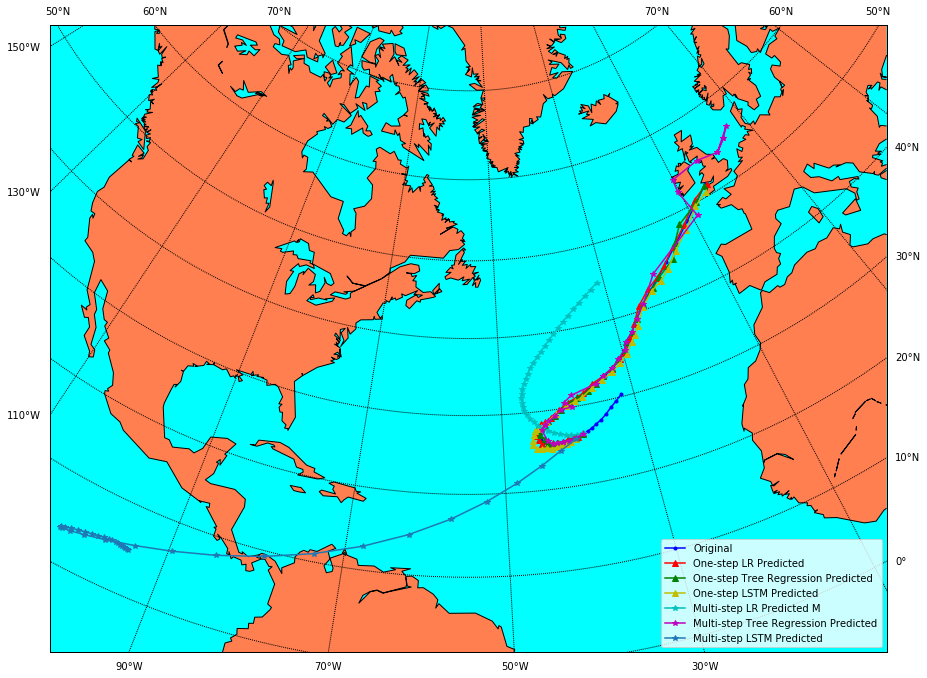

In [48]:
# for i in ['AL071906','AL141989','AL042010','AL072000','AL041932']:
predictHurricaneAll("AL071906", [lr_model, tree_model, model])

### For hurricane "AL141989"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


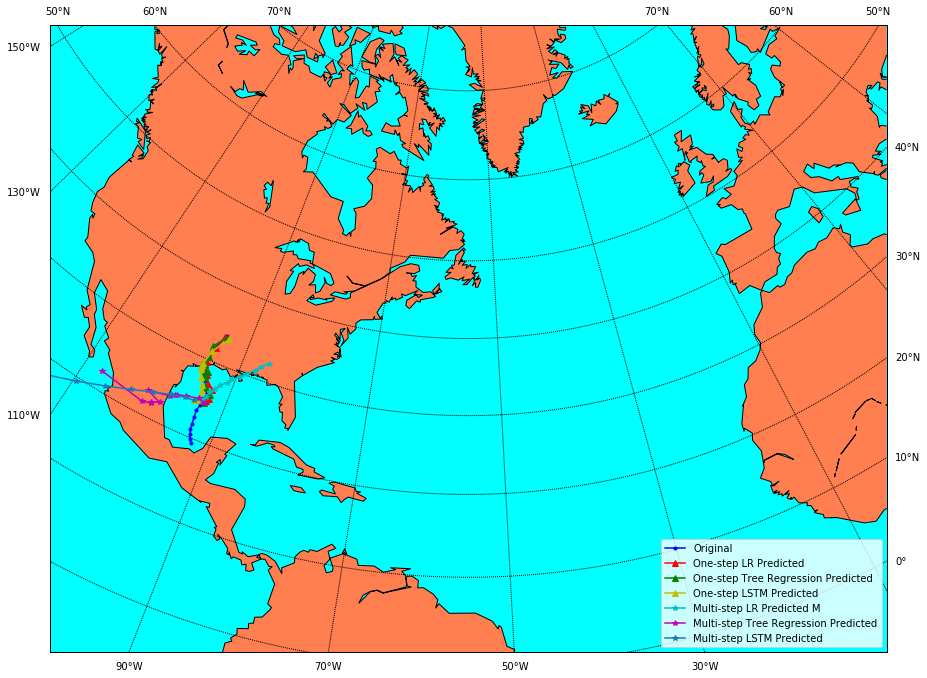

In [49]:
predictHurricaneAll("AL141989", [lr_model, tree_model, model])

### For hurricane "AL042010"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


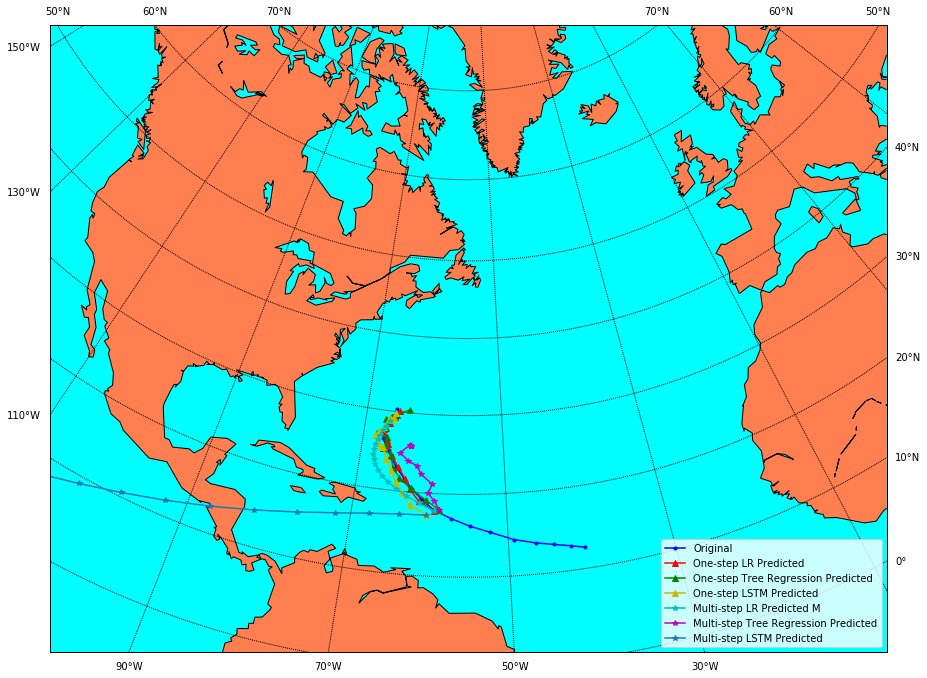

In [50]:
predictHurricaneAll("AL042010", [lr_model, tree_model, model])

### For hurricane "AL072000"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


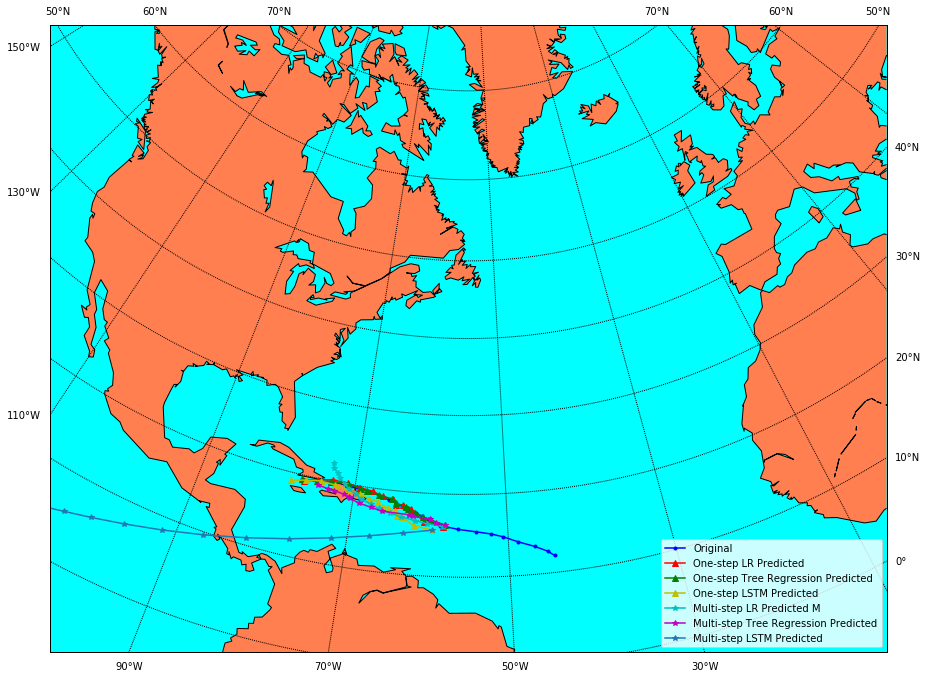

In [51]:
predictHurricaneAll("AL072000", [lr_model, tree_model, model])

### For hurricane "AL041932"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


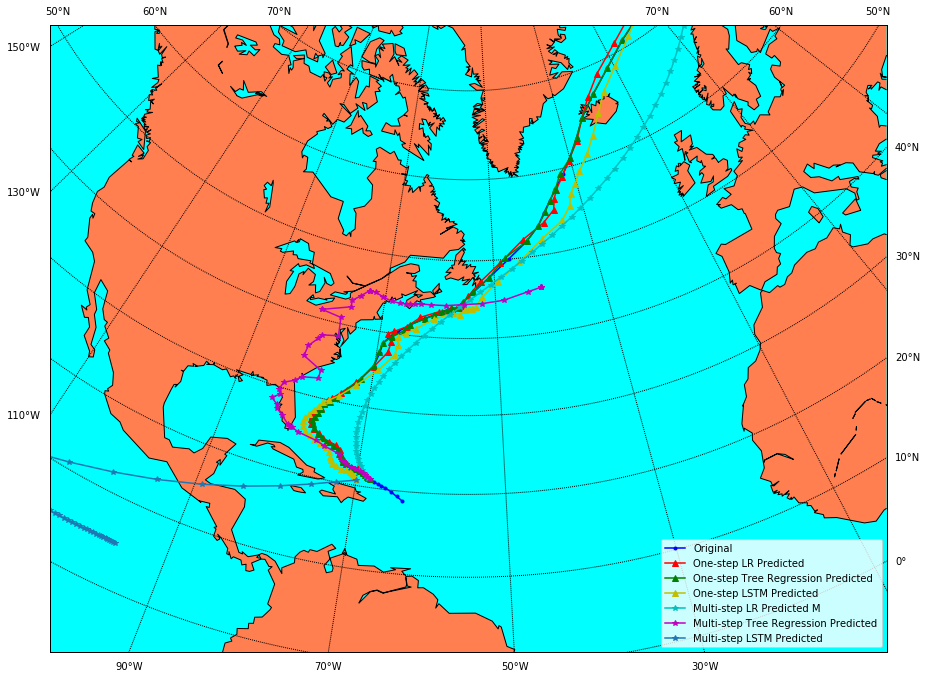

In [52]:
predictHurricaneAll("AL041932", [lr_model, tree_model, model])

### For hurricane "AL101990"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


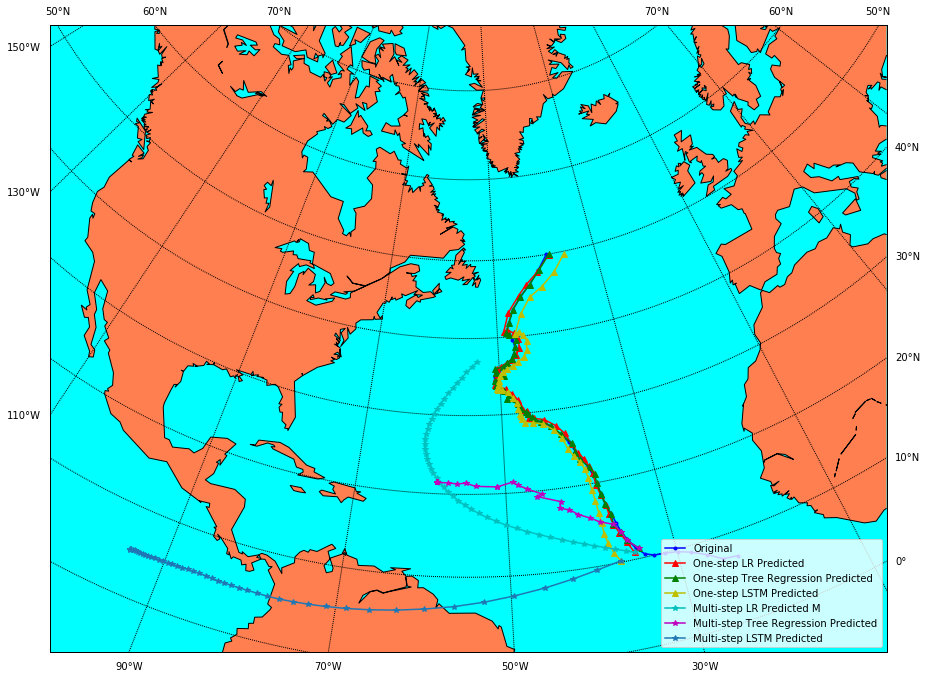

In [53]:
predictHurricaneAll("AL101990", [lr_model, tree_model, model])

### For hurricane "AL081949"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


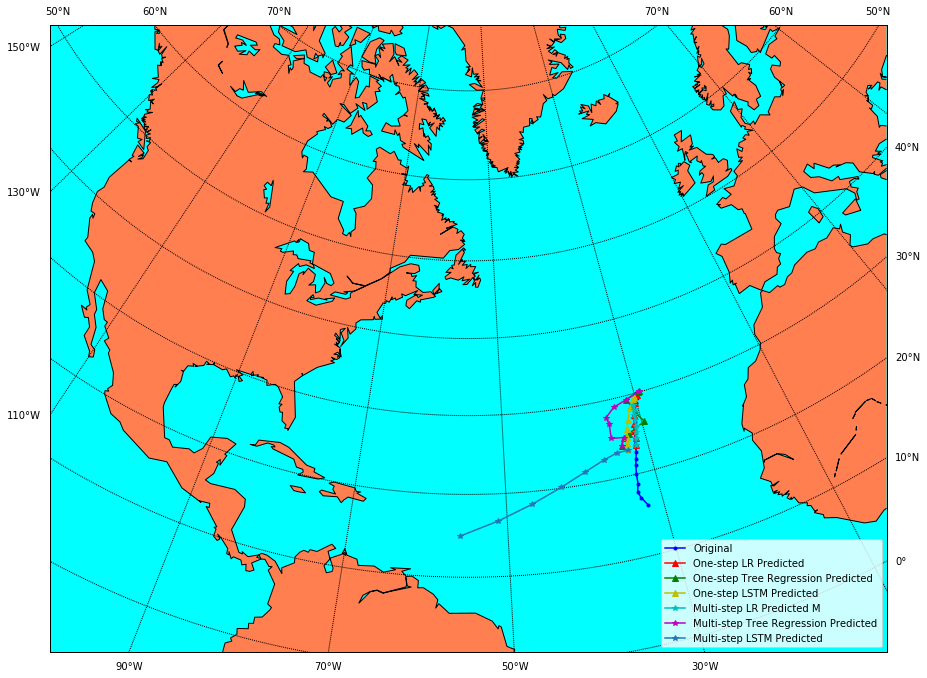

In [54]:
predictHurricaneAll("AL081949", [lr_model, tree_model, model])

### For hurricane "AL011960"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


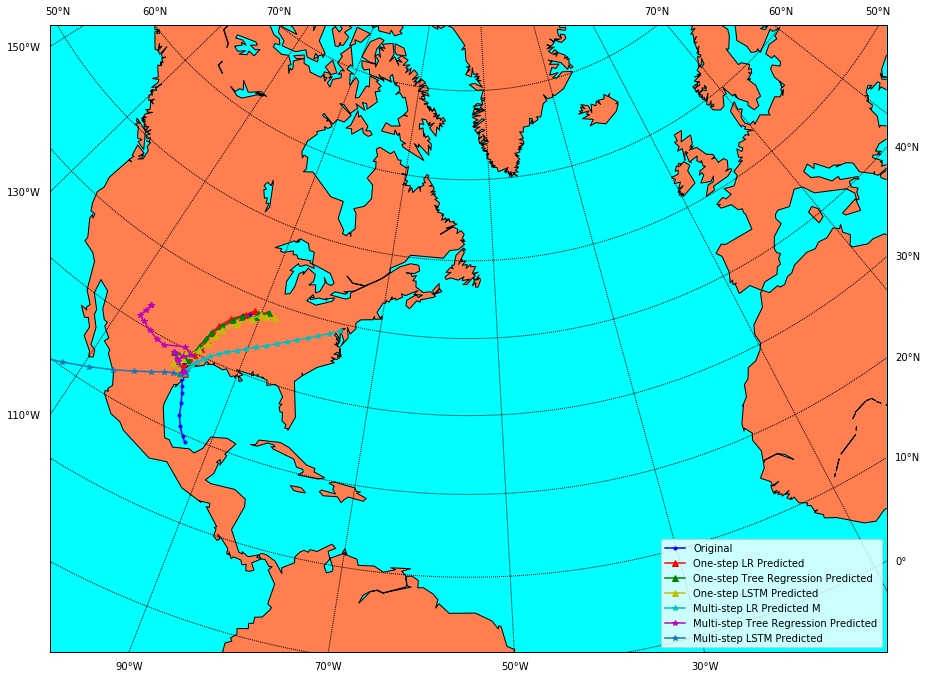

In [55]:
predictHurricaneAll("AL011960", [lr_model, tree_model, model])

### For hurricane "AL091934"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


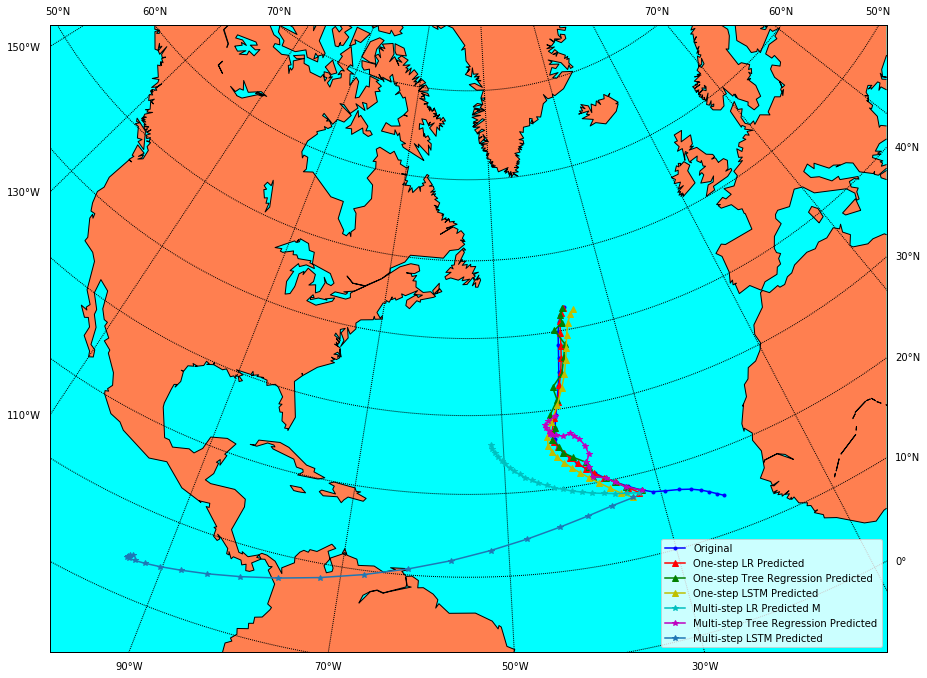

In [56]:
predictHurricaneAll("AL091934", [lr_model, tree_model, model])

### For hurricane "AL081998"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


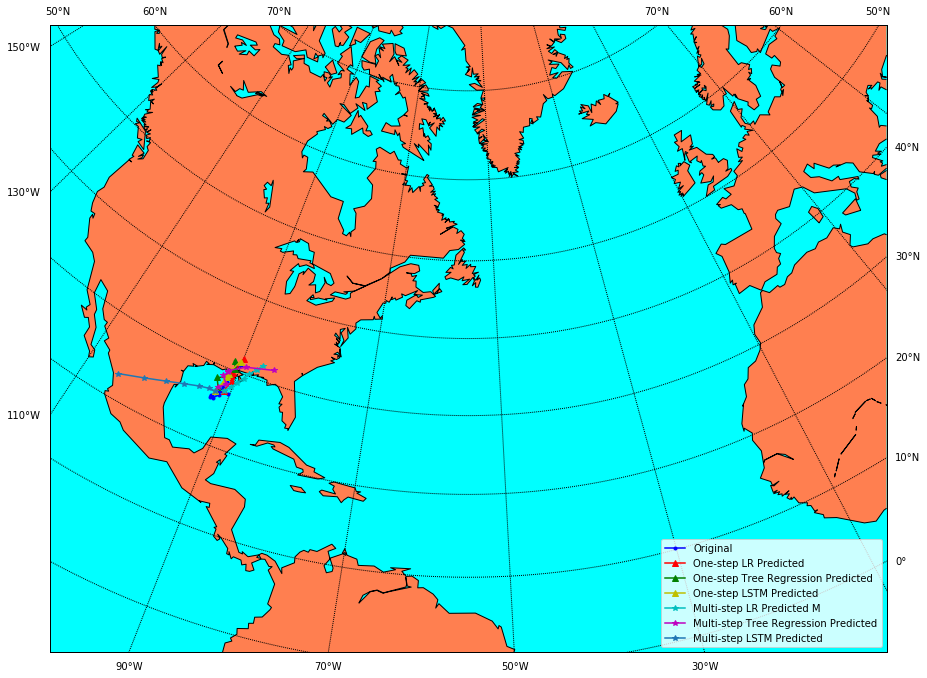

In [57]:
predictHurricaneAll("AL081998", [lr_model, tree_model, model])

### For hurricane "AL101985"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


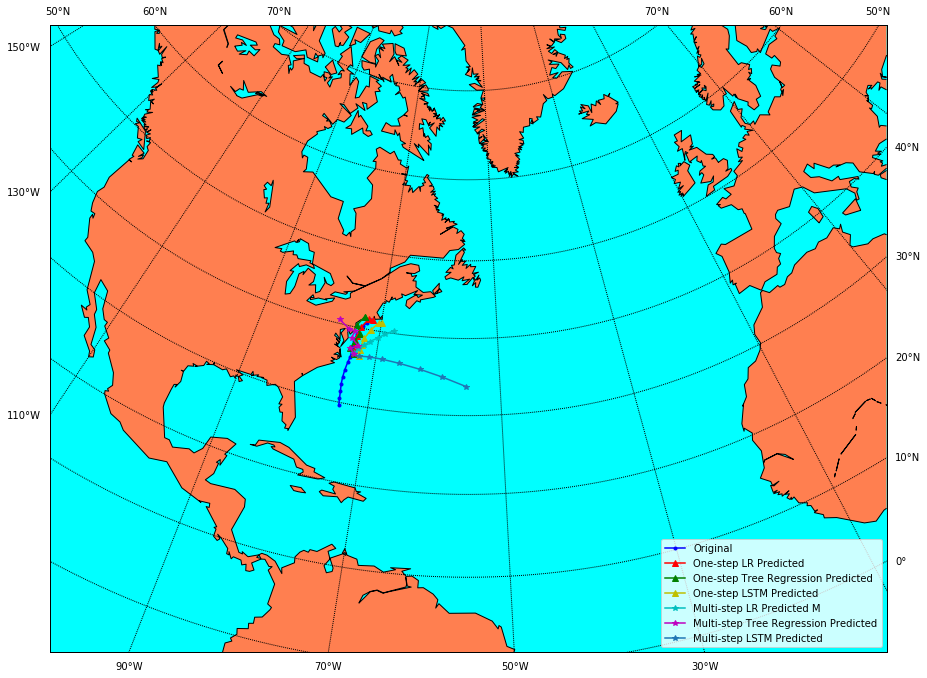

In [58]:
predictHurricaneAll("AL101985", [lr_model, tree_model, model])

### For hurricane "AL101903"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


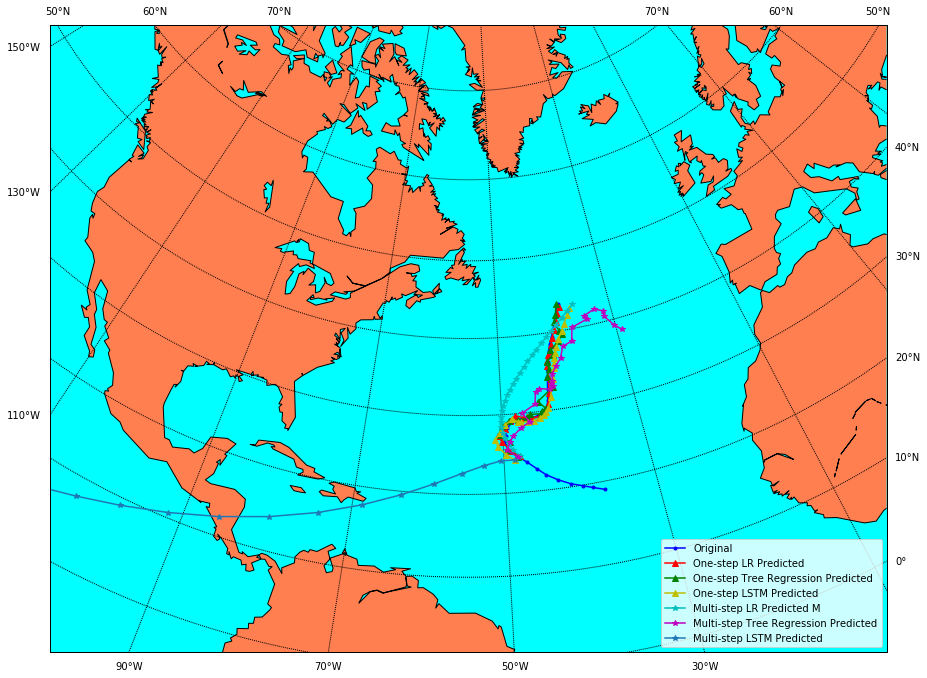

In [59]:
predictHurricaneAll("AL101903", [lr_model, tree_model, model])

### For hurricane "AL112008"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


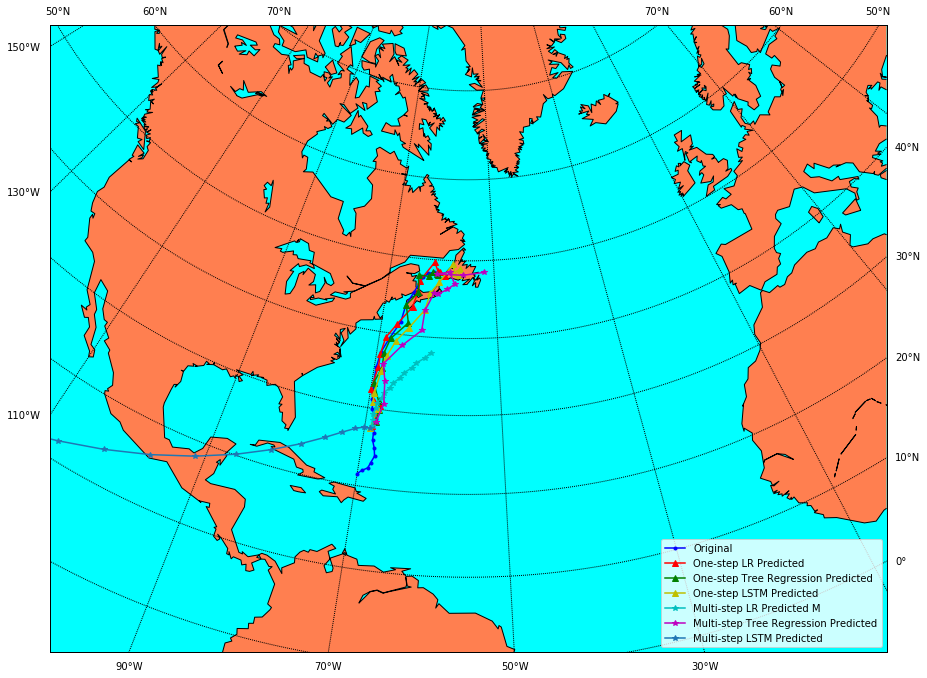

In [60]:
predictHurricaneAll("AL112008", [lr_model, tree_model, model])

### For hurricane "AL031900"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


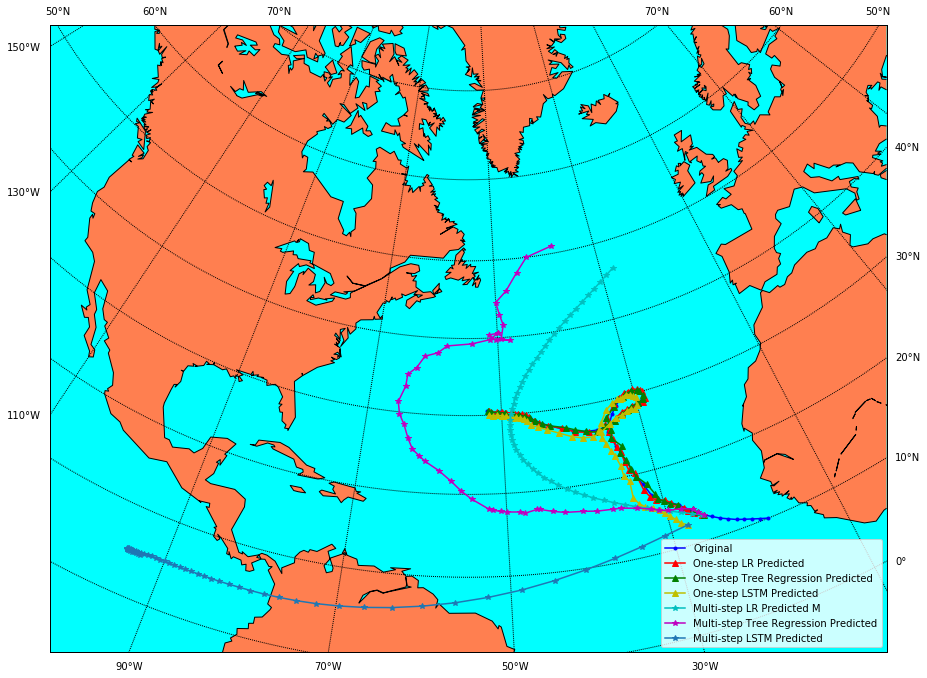

In [61]:
predictHurricaneAll("AL031900", [lr_model, tree_model, model])

### For hurricane "AL112013"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


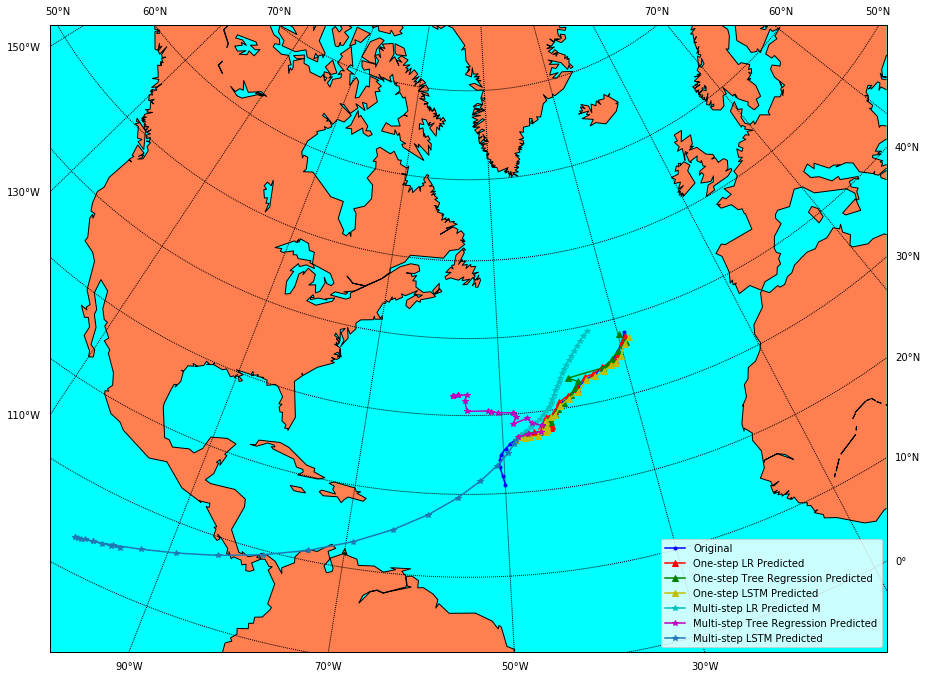

In [62]:
predictHurricaneAll("AL112013", [lr_model, tree_model, model])

### Summary and Conclusion

As what we have observed with the predictions from the visualizations above, we observed that one-step prediction tend to overfit well hence, predicted values are closer to the value of actual data. Meanwhile, multi-step prediction tends to underfit hence, the predicted data seems far away from the actual data (in general).

-
-
#### One-step prediction models

The (one-step) Decision Tree Regressor and (one-step) Linear Regression overfit and remember the dataset well compared to the other models used in this problem. LSTM (one-step) also overfits hence the model is also good for such problem.

-
-
#### Multi-step prediction models

On the other hand, the LSTM (multi-step) provides an extremely opposite predicted output. It is underfitted and it only remembers the horizontal movement of the hurricane. The multi-step linear regression tends to be hyperbolic while the Decision Tree Regression sometimes overfits in certain situations but in other hurricane tests, it underfits. 

-
-
#### On fewer test data per hurricane

It is also noted that in some hurricanes, they have fewer test data. Its predicted output becomes absolutely far away from the actual values, no matter the model used or may it be one-step or multi-step.

----
# END

* Boqin Cai
* Stephanie Tumampos